In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-chess-games/chess_games.csv


In [2]:
df = pd.read_csv("/kaggle/input/online-chess-games/chess_games.csv")

In [3]:
df.head()

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN


In [4]:
df.drop(labels=['game_id','opening_response'], inplace=True, axis=1)

In [5]:
df.shape

(20058, 15)

In [6]:
df.head()

,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_variation
0,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,Exchange Variation
1,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,Kennedy Variation
2,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,Leonardis Variation
3,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,Zukertort Variation
4,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN


In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(14398, 15)

In [9]:
arr = []

for i in range(df.shape[0]):
    arr.append(len(df.iloc[i]['moves'].split(" ")))

temp = pd.DataFrame(data = {'Move Lens': arr})

In [10]:
temp.head()

,Move Lens
0,13
1,16
2,61
3,61
4,5


<AxesSubplot: >

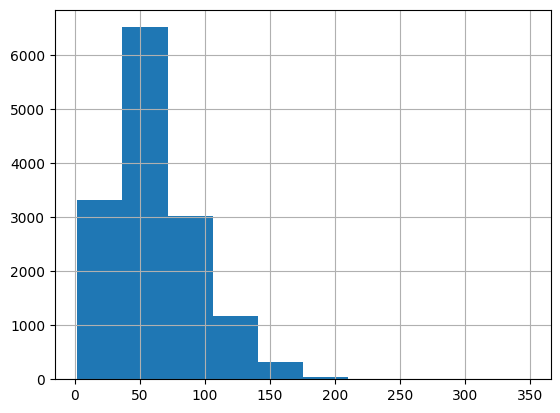

In [11]:
temp['Move Lens'].hist()

In [12]:
for col in df:
    if df[col].dtype == 'object' or df[col].dtype == 'bool':
        df[col] = df[col].factorize()[0]

In [13]:
df.head()

,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_variation
0,0,13,0,0,0,0,1500,0,1191,0,0,5,0,0,0
1,1,16,1,1,1,1,1322,1,1261,1,1,4,1,1,1
2,1,61,2,0,1,2,1496,0,1500,2,2,3,2,2,2
3,1,61,2,0,2,3,1439,2,1454,3,3,3,3,3,3
5,0,5,3,2,3,4,1250,3,1002,4,4,4,4,4,4


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns != 'winner'], df['winner'], test_size=0.3)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression().fit(X_train, y_train)

preds = LR.predict(X_test)

correct = 0

for i, entry in enumerate(preds):
    if entry == y_test.iloc[i]:
        correct += 1

print(correct/len(preds))

0.5967592592592592


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Importing LGBM and XGBOOST
import lightgbm as lgb
import xgboost as xgb

In [17]:
xg=xgb.XGBClassifier(max_depth=7,learning_rate=0.05,silent=1,eta=1,num_round=50) 
  
# Fitting the Model
xg.fit(X_train,y_train) 
  
preds = xg.predict(X_test)


correct = 0

for i, entry in enumerate(preds):
    if entry == y_test.iloc[i]:
        correct += 1

print(correct/len(preds))


[12:03:17] WARNING: ../src/learner.cc:767: 
Parameters: { "num_round", "silent" } are not used.

0.6986111111111111


In [18]:
# Setting the Parameters and Training data for LightGBM Model
data_train = lgb.Dataset(X_train,label = y_train)
params= {}
  
# Usually set between 0 to 1.
params['learning_rate']=0.5 
  
# GradientBoostingDecisionTree
params['boosting_type']='gbdt' 
  
# Multi-class since the target class has 6 classes.
params['objective']='multiclass' 
  
# # Metric for multi-class
params['metric']='multi_logloss' 
params['max_depth']=7
params['num_class']=3
  
# This value is not inclusive of the end value.
# Hence we have 6 classes the value is set to 7.
  
# Training the LightGBM Model
num_round =50

lgbm = lgb.train(params,data_train,num_round)

preds = lgbm.predict(X_test)

temp = []

for entry in preds:
    entry = list(entry)
    temp.append(entry.index(max(entry)))

preds = temp
    
correct = 0

for i, entry in enumerate(preds):
    if entry == y_test.iloc[i]:
        correct += 1

print(correct/len(preds))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 10078, number of used features: 14
[LightGBM] [Info] Start training from score -0.685240
[LightGBM] [Info] Start training from score -0.804501
[LightGBM] [Info] Start training from score -3.021666
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i